In [16]:
# Setup imports
import sys
sys.path.append("..")  # allow import from project root

import pandas as pd
import matplotlib.pyplot as plt

from engine.backtester import Backtester
from strategies.moving_average import MovingAverageStrategy
from utils.metrics import CAGR, sharpe_ratio, max_drawdown, win_rate, profit_factor

In [17]:
# Load data
data_path = "../data/EURUSD.csv"
df = pd.read_csv(data_path)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Date'] = df['Date'].str.split(' ').str[0:2]
df['Date'] = df['Date'].str.join(' ')
df.set_index('Date', inplace = True)
df.index = pd.to_datetime(df.index, format = '%d.%m.%Y %H:%M:%S.%f')

In [18]:
# Add strategy signals
fast_window = 50
slow_window = 200
atr_window = 20
atr_sl = 0.5

# Add the moving average signals column
df = MovingAverageStrategy(df, fast_window, slow_window, atr_window, atr_sl).generate_signals()
df.head(5)

,Open,High,Low,Close,Volume,fast_sma,slow_sma,ATR,signal
Date,,,,,,,,,
2024-04-18 23:30:00,1.06485,1.06495,1.06421,1.06452,6722.0400,NaN,NaN,NaN,NaN
2024-04-19 00:30:00,1.06452,1.06484,1.06427,1.06438,4456.1899,NaN,NaN,NaN,NaN
2024-04-19 01:30:00,1.06437,1.06459,1.06415,1.06440,2218.8501,NaN,NaN,NaN,NaN
2024-04-19 02:30:00,1.06442,1.06460,1.06437,1.06442,2643.6799,NaN,NaN,NaN,NaN
2024-04-19 03:30:00,1.06443,1.06447,1.06407,1.06408,738.9400,NaN,NaN,NaN,NaN


In [19]:
# Run backtest
account_size = 100000
backtester = Backtester(df, account_size=account_size)
backtester.run()
trade_log = backtester.get_trade_log()

In [20]:
# Performance summary and metrics
if not trade_log.empty:
    trade_log['cumulative_sum'] = trade_log['Net PnL'].cumsum() + account_size
    print(trade_log.head())

    print("\n===== Performance Metrics =====")
    print(f"CAGR (%): {CAGR(trade_log, account_size)}")
    print(f"Sharpe Ratio: {sharpe_ratio(trade_log)}")
    print(f"Max Drawdown (%): {max_drawdown(trade_log)}")
    print(f"Win Rate (%): {win_rate(trade_log)}")
    print(f"Profit Factor: {profit_factor(trade_log)}")
else:
    print("No trades were executed.")

          Entry Time   Entry Price           Exit Time   Exit Price   Size   \
0 2024-05-03 09:30:00       1.07324 2024-05-03 13:30:00      1.07429  10000   
1 2024-05-28 12:30:00       1.08776 2024-05-28 13:30:00      1.08702  10000   
2 2024-06-03 16:30:00       1.08433 2024-06-03 18:30:00      1.08521  10000   
3 2024-06-26 08:30:00       1.07112 2024-06-26 10:30:00      1.07040  10000   
4 2024-07-01 13:30:00       1.07685 2024-07-01 14:30:00      1.07573  10000   

   Spread  Direction   Take Profit   Stop Loss   Net PnL Exit Type   \
0    10000        Buy      1.073751    1.072729      8.5     Profit   
1    10000        Buy      1.088067    1.087453     -9.4       Loss   
2    10000        Buy      1.084740    1.083920      6.8     Profit   
3    10000        Buy      1.071518    1.070722     -9.2       Loss   
4    10000        Buy      1.077527    1.076173    -13.2       Loss   

   cumulative_sum  
0        100008.5  
1         99999.1  
2        100005.9  
3         99996.7 

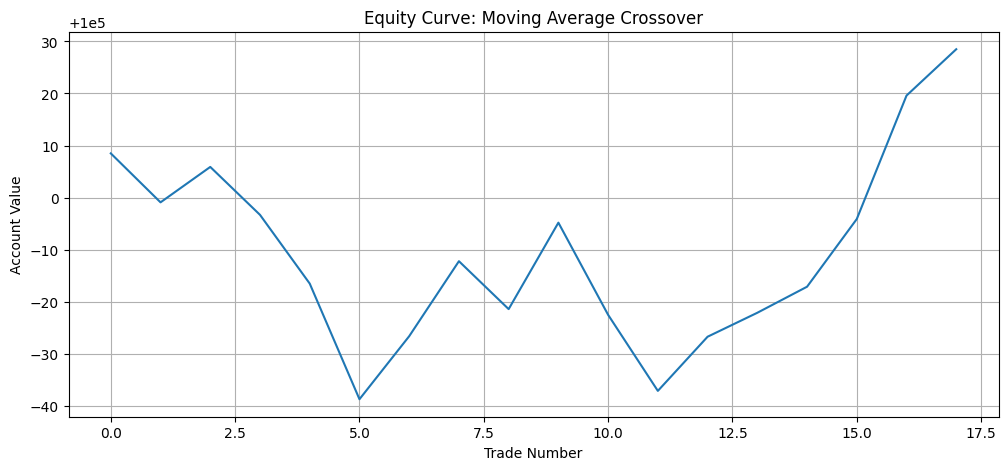

In [21]:
# Visualize results (Equity curve)
if not trade_log.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(trade_log['cumulative_sum'])
    plt.title("Equity Curve: Moving Average Crossover")
    plt.xlabel("Trade Number")
    plt.ylabel("Account Value")
    plt.grid()
    plt.show()